# *Interprablity of Gradiant Boosting and XGBoost*



In [2]:
import pandas as pd
#Step 1: Read and explore data
file='C:/Users/User/Desktop/PAPERS/Evap/DEVAP.csv'
#Step 1: Read and explore data
file='C:/Users/Addisu/Desktop/kidi files/kidi/Evap/Data/Observed/Metehara/DEVAPll.csv'
raw_data = pd.read_csv(file, parse_dates = ['Date'],
                       index_col = 'Date')

df = raw_data.copy()
df

,PCP,Tmin,Tmax,Month,year,Tmean,Rhmax,Rhmin,Rhmean,Evapoavg,WS,SH
Date,,,,,,,,,,,,
1993-01-01,0.0,20.8,31.6,1,1993,26.20,75.0,40.0,57.5,3.471109,1.8,8.4
1993-01-02,0.0,17.8,32.0,1,1993,24.90,81.0,44.0,62.5,3.421044,1.6,8.3
1993-01-03,0.0,14.0,33.0,1,1993,23.50,89.0,41.0,65.0,4.001721,1.2,10.5
1993-01-04,0.0,12.6,32.0,1,1993,22.30,91.0,46.0,68.5,3.618233,2.1,9.2
1993-01-05,0.0,16.2,33.8,1,1993,25.00,82.0,43.0,62.5,3.844625,1.4,9.8
...,...,...,...,...,...,...,...,...,...,...,...,...
2016-12-27,0.0,10.5,31.0,12,2016,20.75,83.0,26.0,54.5,1.150054,0.8,0.1
2016-12-28,0.0,8.4,32.0,12,2016,20.20,86.0,27.0,56.5,3.723602,0.9,10.3
2016-12-29,0.0,9.0,32.0,12,2016,20.50,80.0,28.0,54.0,1.185701,1.0,0.2


In [3]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingRegressor
import matplotlib as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import numpy as np
from sklearn import metrics, svm
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes  import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import cohen_kappa_score
from xgboost import XGBRegressor


In [4]:
# Read data from  csv files
X = df.drop(["Evapoavg"], axis=1)
y = df["Evapoavg"]
Input_data_features = X.values
Input_data_labels =y.values


# standardize input features X and output labels Y
#scaler_standardized_X = StandardScaler()
#Input_data_features = scaler_standardized_X.fit_transform(Input_data_features)

#scaler_standardized_Y = StandardScaler()
#Input_data_labels = scaler_standardized_Y.fit_transform(Input_data_labels)


# Split dataset into train, validation, an test
index_X_Train_End = int(0.7 * len(Input_data_features))
index_X_Validation_End = int(0.9 * len(Input_data_features))

X_train = Input_data_features[0: index_X_Train_End]
X_valid = Input_data_features[index_X_Train_End: index_X_Validation_End]
X_test = Input_data_features[index_X_Validation_End:]
Y_valid = Input_data_labels[index_X_Train_End: index_X_Validation_End]
Y_test = Input_data_labels[index_X_Validation_End:]
Y_train = Input_data_labels[0: index_X_Train_End]


In [5]:
#
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestRegressor(random_state = 42)
from pprint import pprint
# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(rf.get_params())

from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pprint(random_grid)

# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 10, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, Y_train)


rf_random.best_params_

def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    errors = abs(predictions - test_labels)
    mape = 100 * np.mean(errors / test_labels)
    accuracy = 100 - mape
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    
    return accuracy
base_model = RandomForestRegressor(n_estimators = 10, random_state = 42)
base_model.fit(X_train, Y_train)
base_accuracy = evaluate(base_model,X_test, Y_test)
rfr = base_model.predict(X_test)

from sklearn import metrics

rfr = base_model.predict(X_test)
score = np.sqrt(metrics.mean_squared_error(Y_test,rfr))
print("Score (RMSE): {}".format(score))

from sklearn.metrics import mean_absolute_error

print('Test MAE  : %.3f'%mean_absolute_error(Y_test,rfr))
#print('Train MAE : %.3f'%mean_absolute_error(_train, lin_reg.predict(X_train)))

from sklearn.metrics import mean_squared_error, mean_squared_log_error
print('Test MSE  : %.3f'%mean_squared_error(Y_test,rfr))



best_random = rf_random.best_estimator_
random_accuracy = evaluate(best_random, X_test, Y_test)
rf = best_random.predict(X_test)
from sklearn import metrics

rf = best_random.predict(X_test)
score = np.sqrt(metrics.mean_squared_error(Y_test,rf))
print("Score (RMSE): {}".format(score))

from sklearn.metrics import mean_absolute_error

print('Test MAE  : %.3f'%mean_absolute_error(Y_test,rf))
#print('Train MAE : %.3f'%mean_absolute_error(_train, lin_reg.predict(X_train)))

from sklearn.metrics import mean_squared_error, mean_squared_log_error
print('Test MSE  : %.3f'%mean_squared_error(Y_test,rf))

print('Improvement of {:0.2f}%.'.format( 100 * (random_accuracy - base_accuracy) / base_accuracy))



Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}
{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}
Fitting 3 folds for each of 10 candidates, totalling 30 fits


C:\anaconda3\envs\jupyterenv\lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
15 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
2 fits failed with the following error:
Traceback (most recent call last):
  File "C:\anaconda3\envs\jupyterenv\lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\anaconda3\envs\jupyterenv\lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "C:\anaconda3\envs\jupyterenv\lib\site-packages\sklearn\base.py", line 637, in _validate_params
    validate_parameter_constraints(
  File "C:\anaconda3\envs\jupyterenv

Model Performance
Average Error: 0.0368 degrees.
Accuracy = 98.92%.
Score (RMSE): 0.05175002834474043
Test MAE  : 0.037
Test MSE  : 0.003
Model Performance
Average Error: 0.1137 degrees.
Accuracy = 95.86%.
Score (RMSE): 0.19241325040836652
Test MAE  : 0.114
Test MSE  : 0.037
Improvement of -3.09%.


In [6]:
# KNeighborsRegressor
from sklearn.neighbors import KNeighborsRegressor
kn = KNeighborsRegressor()
from pprint import pprint
# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(kn.get_params())

def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    errors = abs(predictions - test_labels)
    mape = 100 * np.mean(errors / test_labels)
    accuracy = 100 - mape
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    
    return accuracy

base_model = KNeighborsRegressor()
base_model.fit(X_train, Y_train)
base_accuracy = evaluate(base_model,X_test, Y_test)
rfr = base_model.predict(X_test)
score = np.sqrt(metrics.mean_squared_error(Y_test,rfr))
print("Score (RMSE): {}".format(score))

from sklearn.metrics import mean_absolute_error

print('Test MAE  : %.3f'%mean_absolute_error(Y_test,rfr))
#print('Train MAE : %.3f'%mean_absolute_error(_train, lin_reg.predict(X_train)))

from sklearn.metrics import mean_squared_error, mean_squared_log_error
print('Test MSE  : %.3f'%mean_squared_error(Y_test,rfr))

grid_params={
            'n_neighbors': [3,5.11,19],
            'weights': ['uniform','distance'],
            'metric':['euclidean','manhattan','minkowski']
             }


from sklearn.model_selection import RandomizedSearchCV
best_random =RandomizedSearchCV( KNeighborsRegressor(), 
                         grid_params, 
                         cv = 3, verbose=2, n_jobs = -1)
best_random.fit(X_train, Y_train)
best_random.best_params_
best_random.best_score_

#best_random = kn_random.best_estimator_
random_accuracy = evaluate(best_random, X_test, Y_test)
kn = best_random.predict(X_test)
score = np.sqrt(metrics.mean_squared_error(Y_test,kn))
print("Score (RMSE): {}".format(score))

from sklearn.metrics import mean_absolute_error

print('Test MAE  : %.3f'%mean_absolute_error(Y_test,kn))
#print('Train MAE : %.3f'%mean_absolute_error(_train, lin_reg.predict(X_train)))

from sklearn.metrics import mean_squared_error, mean_squared_log_error
print('Test MSE  : %.3f'%mean_squared_error(Y_test,kn))


print('Improvement of {:0.2f}%.'.format( 100 * (random_accuracy - base_accuracy) / base_accuracy))


Parameters currently in use:

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}
Model Performance
Average Error: 0.4938 degrees.
Accuracy = 84.58%.
Score (RMSE): 0.713531562193988
Test MAE  : 0.494
Test MSE  : 0.509
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Model Performance
Average Error: 0.4052 degrees.
Accuracy = 86.77%.
Score (RMSE): 0.6024320401394331
Test MAE  : 0.405
Test MSE  : 0.363
Improvement of 2.60%.


C:\anaconda3\envs\jupyterenv\lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
12 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
12 fits failed with the following error:
Traceback (most recent call last):
  File "C:\anaconda3\envs\jupyterenv\lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\anaconda3\envs\jupyterenv\lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "C:\anaconda3\envs\jupyterenv\lib\site-packages\sklearn\base.py", line 637, in _validate_params
    validate_parameter_constraints(
  File "C:\anaconda3\envs\jupyteren

In [7]:
# Decsion TREE
from sklearn.tree import DecisionTreeRegressor


dt= DecisionTreeRegressor()
from pprint import pprint
# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(dt.get_params())

from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}
               #'bootstrap': bootstrap}
pprint(random_grid)

# Use the random grid to search for best hyperparameters
# FirsDecisionTreeRegressort create the base model to tune
dt = DecisionTreeRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
dt_random = RandomizedSearchCV(estimator = dt, 
                               param_distributions = random_grid, 
                               n_iter = 10, 
                               cv = 3, 
                               verbose=2, 
                               random_state=42, 
                               n_jobs = -1)
# Fit the random search model
dt_random.fit(X_train, Y_train)


dt_random.best_params_

def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    errors = abs(predictions - test_labels)
    mape = 100 * np.mean(errors / test_labels)
    accuracy = 100 - mape
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    
    return accuracy
base_model = DecisionTreeRegressor()
base_model.fit(X_train, Y_train)
base_accuracy = evaluate(base_model,X_test, Y_test)
dtb = base_model.predict(X_test)

from sklearn import metrics

dtb = base_model.predict(X_test)
score = np.sqrt(metrics.mean_squared_error(Y_test,dtb))
print("Score (RMSE): {}".format(score))

from sklearn.metrics import mean_absolute_error

print('Test MAE  : %.3f'%mean_absolute_error(Y_test,dtb))
#print('Train MAE : %.3f'%mean_absolute_error(_train, lin_reg.predict(X_train)))

from sklearn.metrics import mean_squared_error, mean_squared_log_error
print('Test MSE  : %.3f'%mean_squared_error(Y_test,dtb))



best_random = dt_random.best_estimator_
random_accuracy = evaluate(best_random, X_test, Y_test)
dtbe = best_random.predict(X_test)
from sklearn import metrics

dtbe = best_random.predict(X_test)
score = np.sqrt(metrics.mean_squared_error(Y_test,dtbe))
print("Score (RMSE): {}".format(score))

from sklearn.metrics import mean_absolute_error

print('Test MAE  : %.3f'%mean_absolute_error(Y_test,dtbe))
#print('Train MAE : %.3f'%mean_absolute_error(_train, lin_reg.predict(X_train)))

from sklearn.metrics import mean_squared_error, mean_squared_log_error
print('Test MSE  : %.3f'%mean_squared_error(Y_test,dtbe))

print('Improvement of {:0.2f}%.'.format( 100 * (random_accuracy - base_accuracy) / base_accuracy))



Parameters currently in use:

{'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}
{'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10]}
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Model Performance
Average Error: 0.0469 degrees.
Accuracy = 98.62%.
Score (RMSE): 0.06608120252211808
Test MAE  : 0.047
Test MSE  : 0.004
Model Performance
Average Error: 0.1904 degrees.
Accuracy = 93.22%.
Score (RMSE): 0.39123147728146146
Test MAE  : 0.190
Test MSE  : 0.153
Improvement of -5.48%.


C:\anaconda3\envs\jupyterenv\lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
15 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
12 fits failed with the following error:
Traceback (most recent call last):
  File "C:\anaconda3\envs\jupyterenv\lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\anaconda3\envs\jupyterenv\lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "C:\anaconda3\envs\jupyterenv\lib\site-packages\sklearn\base.py", line 637, in _validate_params
    validate_parameter_constraints(
  File "C:\anaconda3\envs\jupyteren

In [8]:
# gradiant booster
from sklearn.ensemble import GradientBoostingRegressor
gb = GradientBoostingRegressor(random_state = 42)
from pprint import pprint
# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(gb.get_params())

from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}
               #'bootstrap': bootstrap}
pprint(random_grid)

# Use the random grid to search for best hyperparameters
# First create the base model to tune
gb = GradientBoostingRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
gb_random = RandomizedSearchCV(estimator = gb, 
                               param_distributions = random_grid, 
                               n_iter = 10, 
                               cv = 3, 
                               verbose=2, 
                               random_state=42, 
                               n_jobs = -1)
# Fit the random search model
gb_random.fit(X_train, Y_train)


gb_random.best_params_

def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    errors = abs(predictions - test_labels)
    mape = 100 * np.mean(errors / test_labels)
    accuracy = 100 - mape
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    
    return accuracy
base_model = GradientBoostingRegressor(n_estimators = 10, random_state = 42)
base_model.fit(X_train, Y_train)
base_accuracy = evaluate(base_model,X_test, Y_test)
gbb = base_model.predict(X_test)

from sklearn import metrics

gbb = base_model.predict(X_test)
score = np.sqrt(metrics.mean_squared_error(Y_test,gbb))
print("Score (RMSE): {}".format(score))

from sklearn.metrics import mean_absolute_error

print('Test MAE  : %.3f'%mean_absolute_error(Y_test,gbb))
#print('Train MAE : %.3f'%mean_absolute_error(_train, lin_reg.predict(X_train)))

from sklearn.metrics import mean_squared_error, mean_squared_log_error
print('Test MSE  : %.3f'%mean_squared_error(Y_test,gbb))



best_random = gb_random.best_estimator_
random_accuracy = evaluate(best_random, X_test, Y_test)
gbbe = best_random.predict(X_test)
from sklearn import metrics

rf = best_random.predict(X_test)
score = np.sqrt(metrics.mean_squared_error(Y_test,gbbe))
print("Score (RMSE): {}".format(score))

from sklearn.metrics import mean_absolute_error

print('Test MAE  : %.3f'%mean_absolute_error(Y_test,gbbe))
#print('Train MAE : %.3f'%mean_absolute_error(_train, lin_reg.predict(X_train)))

from sklearn.metrics import mean_squared_error, mean_squared_log_error
print('Test MSE  : %.3f'%mean_squared_error(Y_test,gbbe))

print('Improvement of {:0.2f}%.'.format( 100 * (random_accuracy - base_accuracy) / base_accuracy))





parameters = {'objective':['reg:squarederror'],
              'booster':['gbtree','gblinear'],
              'learning_rate': [0.1], 
              'max_depth': [7,10,15,20],
              'min_child_weight': [10,15,20,25],
              'colsample_bytree': [0.8, 0.9, 1],
              'n_estimators': [300,400,500,600],
              "reg_alpha"   : [0.5,0.2,1],
              "reg_lambda"  : [2,3,5],
              "gamma"       : [1,2,3]}

xgb_model = XGBRegressor(random_state=30)

grid_obj_xgb = RandomizedSearchCV(xgb_model,parameters, cv=5,n_iter=5,scoring='neg_mean_absolute_error',verbose=5,n_jobs=12)
grid_obj_xgb.fit(X_train, Y_train,verbose = 1)

#y_pred_train = grid_obj_xgb.predict(df_train)
y_pred_test = grid_obj_xgb.predict(X_test)

from pprint import pprint
# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(xgb_model.get_params())

def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    errors = abs(predictions - test_labels)
    mape = 100 * np.mean(errors / test_labels)
    accuracy = 100 - mape
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    
    return accuracy
base_model = XGBRegressor(random_state=30)
base_model.fit(X_train, Y_train)
base_accuracy = evaluate(base_model,X_test, Y_test)
xgbb = base_model.predict(X_test)
score = np.sqrt(metrics.mean_squared_error(Y_test,xgbb))
print("Score (RMSE): {}".format(score))

from sklearn.metrics import mean_absolute_error

print('Test MAE  : %.3f'%mean_absolute_error(Y_test,xgbb))
#print('Train MAE : %.3f'%mean_absolute_error(_train, lin_reg.predict(X_train)))

from sklearn.metrics import mean_squared_error, mean_squared_log_error
print('Test MSE  : %.3f'%mean_squared_error(Y_test,xgbb))



y_pred_test = grid_obj_xgb.predict(X_test)
grid_obj_xgb.best_params_
grid_obj_xgb.best_score_

#best_random = kn_random.best_estimator_
random_accuracy = evaluate(grid_obj_xgb, X_test, Y_test)
y_pred_test = grid_obj_xgb.predict(X_test)
score = np.sqrt(metrics.mean_squared_error(Y_test,y_pred_test))
print("Score (RMSE): {}".format(score))

from sklearn.metrics import mean_absolute_error

print('Test MAE  : %.3f'%mean_absolute_error(Y_test,y_pred_test))
#print('Train MAE : %.3f'%mean_absolute_error(_train, lin_reg.predict(X_train)))

from sklearn.metrics import mean_squared_error, mean_squared_log_error
print('Test MSE  : %.3f'%mean_squared_error(Y_test,y_pred_test))


print('Improvement of {:0.2f}%.'.format( 100 * (random_accuracy - base_accuracy) / base_accuracy))


Parameters currently in use:

{'alpha': 0.9,
 'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'squared_error',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'random_state': 42,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}
{'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}
Fitting 3 folds for each of 10 candidates, totalling 30 fits


C:\anaconda3\envs\jupyterenv\lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
15 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "C:\anaconda3\envs\jupyterenv\lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\anaconda3\envs\jupyterenv\lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "C:\anaconda3\envs\jupyterenv\lib\site-packages\sklearn\base.py", line 637, in _validate_params
    validate_parameter_constraints(
  File "C:\anaconda3\envs\jupyteren

Model Performance
Average Error: 0.3122 degrees.
Accuracy = 89.98%.
Score (RMSE): 0.40768655451597013
Test MAE  : 0.312
Test MSE  : 0.166
Model Performance
Average Error: 0.0934 degrees.
Accuracy = 96.62%.
Score (RMSE): 0.15899805537212097
Test MAE  : 0.093
Test MSE  : 0.025
Improvement of 7.37%.
Fitting 5 folds for each of 5 candidates, totalling 25 fits
Parameters currently in use:

{'base_score': None,
 'booster': None,
 'callbacks': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': None,
 'early_stopping_rounds': None,
 'enable_categorical': False,
 'eval_metric': None,
 'feature_types': None,
 'gamma': None,
 'gpu_id': None,
 'grow_policy': None,
 'importance_type': None,
 'interaction_constraints': None,
 'learning_rate': None,
 'max_bin': None,
 'max_cat_threshold': None,
 'max_cat_to_onehot': None,
 'max_delta_step': None,
 'max_depth': None,
 'max_leaves': None,
 'min_child_weight': None,
 'missing': nan,
 'monotone_constraints': None,
 'n_estim

# PLOTING ALL MODELS

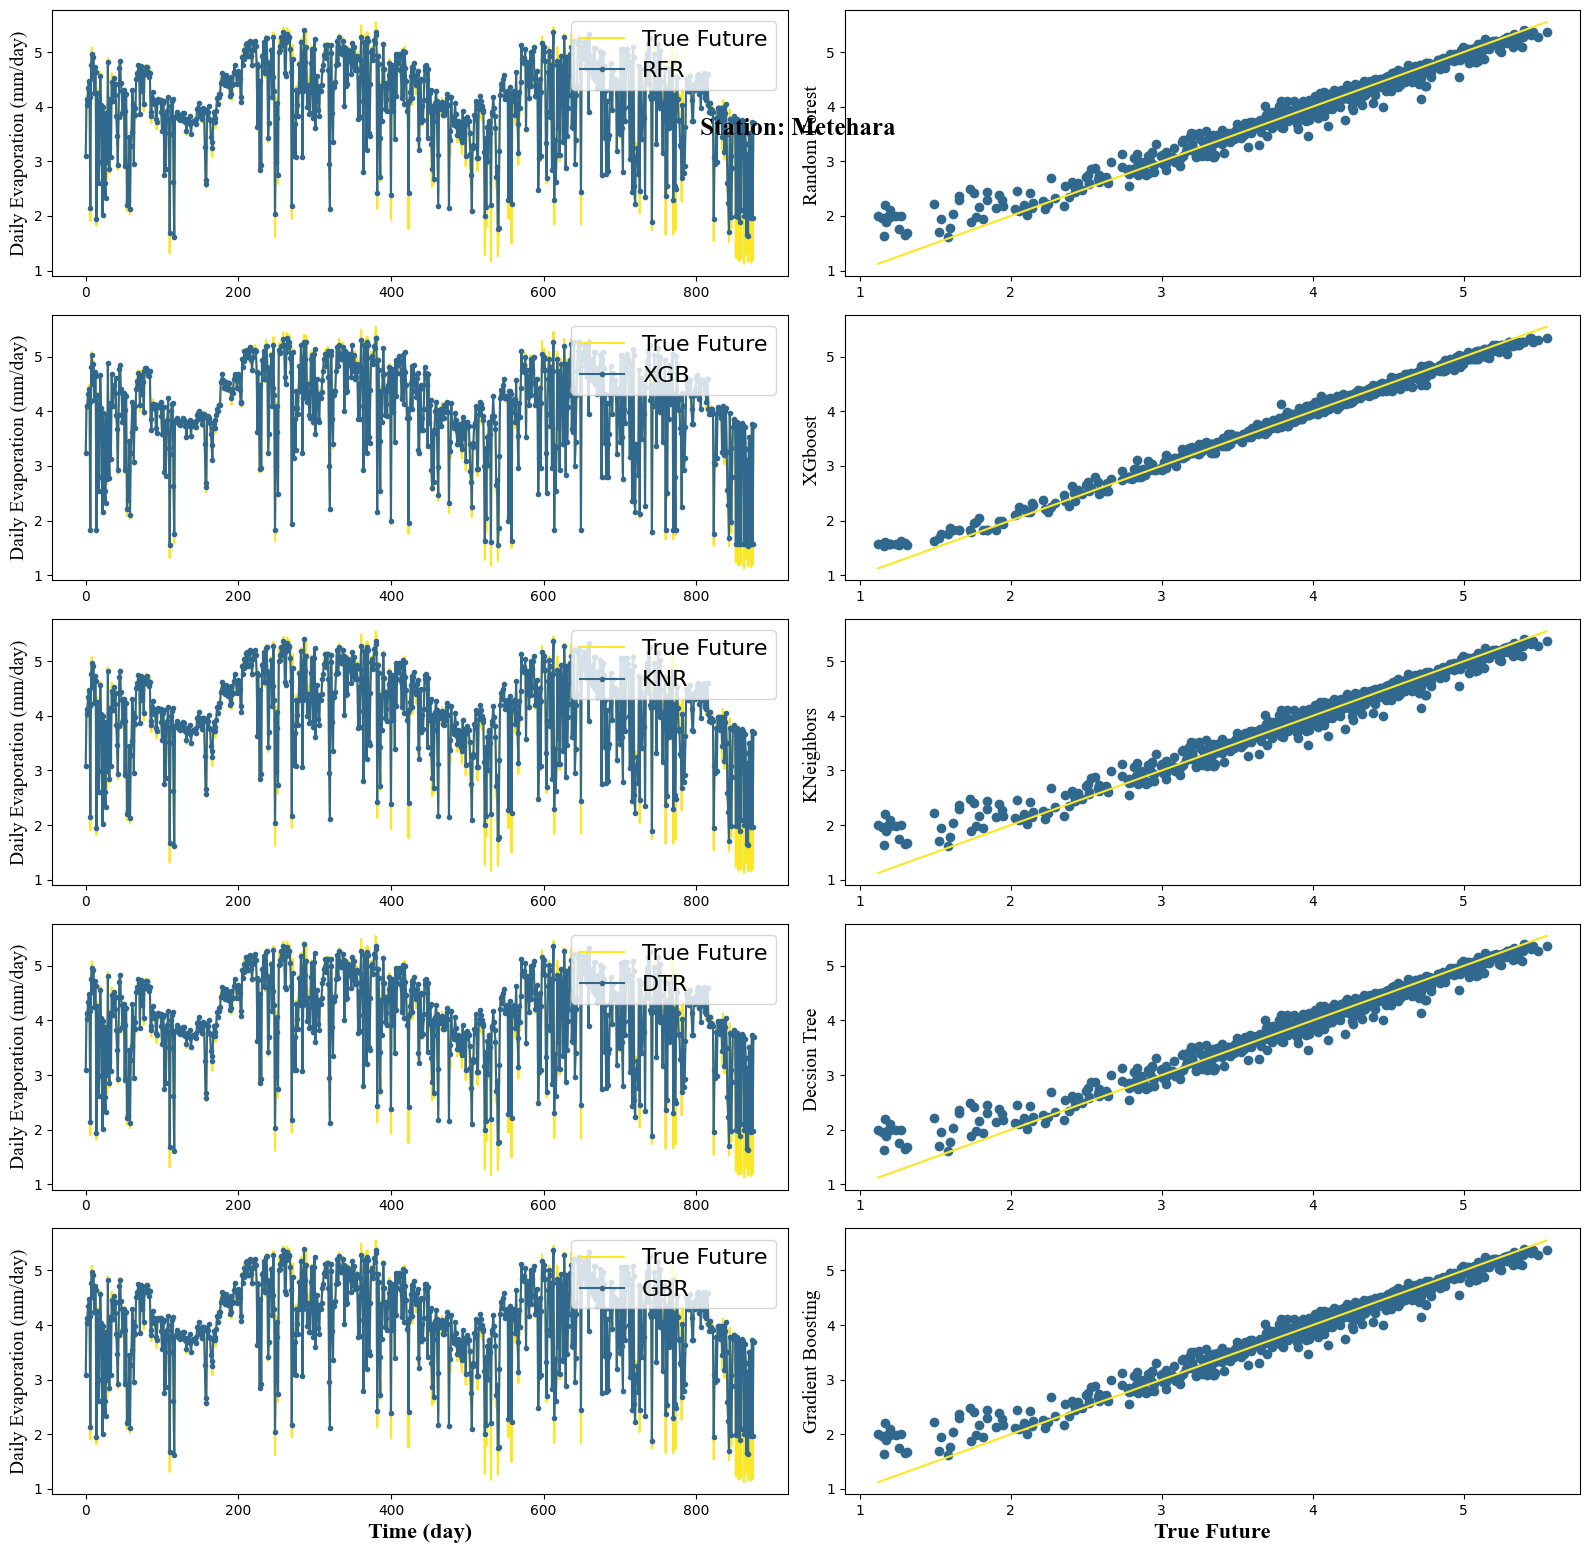

In [9]:
from matplotlib import pyplot as plt
from matplotlib import cm
import warnings
warnings.filterwarnings("ignore")
from matplotlib.axes._axes import _log as matplotlib_axes_logger
matplotlib_axes_logger.setLevel('ERROR')
from matplotlib.gridspec import GridSpec

from matplotlib import gridspec
viridis = cm.get_cmap('viridis', 4)
colors = [viridis(i) for i in range(0, 8)]

y_pred_test = grid_obj_xgb.predict(X_test)
kn = best_random.predict(X_test)
rf = best_random.predict(X_test)
dtbe = best_random.predict(X_test)
gbbe = best_random.predict(X_test)

range_futurel = len(rf)
range_future2 = len(y_pred_test)
range_future3 = len(kn )
range_future4 = len(dtbe)
range_future5 = len(gbbe)

plt.figure(figsize=(16,16))
G = gridspec.GridSpec(5, 2)
plt.suptitle(' Station: Metehara',fontname="Times New Roman", size=18,fontweight="bold", y=0.9)

axs_1 = plt.subplot(G[0,0])
#axs_1.set_xlabel('Time (day)', linespacing=3)
axs_1.set_ylabel('Daily Evaporation (mm/day)',fontname="Times New Roman",fontsize=14, linespacing=3)
axs_1.text(0.5, 0.5, '', ha='center', va='center', size=24, alpha=.5)
axs_1.plot(np.arange( range_futurel), np.array(Y_test), label='True Future',c=colors[4])     
axs_1.plot(np.arange( range_futurel),np.array(rf),label='RFR',c=colors[1],marker = '.')
axs_1.legend(['True Future', 'RFR'], loc='upper right',fontsize=16)

axs_2 = plt.subplot(G[0, 1])
#axs_2.set_xlabel('True Future', linespacing=3)
axs_2.set_ylabel('Random Forest ',fontname="Times New Roman", linespacing=3,fontsize=14)
axs_2.scatter(Y_test, rf, c=colors[1])
#plt.yscale('log')
#plt.xscale('log')
p1 = max(max(rf), max(Y_test))
p2 = min(min(rf), min(Y_test))
plt.plot([p1, p2], [p1, p2], 'b-',c=colors[4])
#plt.axis('equal')


axs_3 = plt.subplot(G[1,0])
#axs_3.set_xlabel('Time (day)', linespacing=3)
axs_3.set_ylabel('Daily Evaporation (mm/day)',fontname="Times New Roman",fontsize=14, linespacing=3)
#axs_3.text(0.5, 0.5, '', ha='center', va='center', size=24, alpha=.5)
axs_3.plot(np.arange( range_future2), np.array(Y_test), label='True Future',c=colors[4])     
axs_3.plot(np.arange( range_future2),np.array(y_pred_test),label='RFR',c=colors[1],marker = '.')
axs_3.legend(['True Future', 'XGB'], loc='upper right',fontsize=16)

axs_4 = plt.subplot(G[1,1])
#axs_4.set_xlabel('True Future', linespacing=3)
axs_4.set_ylabel('XGboost ',fontname="Times New Roman", linespacing=3,fontsize=14)
axs_4.scatter(Y_test, y_pred_test, c=colors[1])
#plt.yscale('log')
#plt.xscale('log')
p1 = max(max(y_pred_test), max(Y_test))
p2 = min(min(y_pred_test), min(Y_test))
plt.plot([p1, p2], [p1, p2], 'b-',c=colors[4])
#plt.axis('equal')

axs_5 = plt.subplot(G[2,0],sharex=axs_1, sharey=axs_1)
#axs_5.set_xlabel('Time (day)', linespacing=3)
axs_5.set_ylabel('Daily Evaporation (mm/day)', fontname="Times New Roman",fontsize=14,linespacing=3)
axs_5.text(0.5, 0.5, '', ha='center', va='center', size=24, alpha=.5)
axs_5.plot(np.arange( range_future3), np.array(Y_test), label='True Future',c=colors[4])     
axs_5.plot(np.arange( range_future3),np.array(kn),label='RFR',c=colors[1],marker = '.')
axs_5.legend(['True Future', 'KNR'], loc='upper right',fontsize=16)

axs_6 = plt.subplot(G[2,1])
#axs_6.set_xlabel('True Future', linespacing=3)
axs_6.set_ylabel('KNeighbors ',fontname="Times New Roman", linespacing=3,fontsize=14)
axs_6.scatter(Y_test, kn, c=colors[1])
#plt.yscale('log')
#plt.xscale('log')
p1 = max(max(kn), max(Y_test))
p2 = min(min(kn), min(Y_test))
plt.plot([p1, p2], [p1, p2], 'b-',c=colors[4])
#plt.axis('equal')

axs_7 = plt.subplot(G[3,0],sharex=axs_1, sharey=axs_1)
#axs_7.set_xlabel('Time (day)', linespacing=3)
axs_7.set_ylabel('Daily Evaporation (mm/day)',fontname="Times New Roman",fontsize=14, linespacing=3)
axs_7.text(0.5, 0.5, '', ha='center', va='center', size=24, alpha=.5)
axs_7.plot(np.arange( range_future4), np.array(Y_test), label='True Future',c=colors[4])     
axs_7.plot(np.arange( range_future4),np.array(dtbe),label='RFR',c=colors[1],marker = '.')
axs_7.legend(['True Future', 'DTR'], loc='upper right',fontsize=16)

axs_8 = plt.subplot(G[3,1])
#axs_8.set_xlabel('True Future', linespacing=3)
axs_8.set_ylabel('Decsion Tree ',fontname="Times New Roman", linespacing=3,fontsize=14)
axs_8.scatter(Y_test,dtbe, c=colors[1])
#plt.yscale('log')
#plt.xscale('log')
p1 = max(max(dtbe), max(Y_test))
p2 = min(min(dtbe), min(Y_test))
plt.plot([p1, p2], [p1, p2], 'b-',c=colors[4])
#plt.axis('equal')

axs_9 = plt.subplot(G[4,0],sharex=axs_1, sharey=axs_1)
axs_9.set_xlabel('Time (day)',fontname="Times New Roman",fontweight="bold", linespacing=3,fontsize=16)
axs_9.set_ylabel('Daily Evaporation (mm/day)',fontname="Times New Roman",fontsize=14, linespacing=3)
axs_9.text(0.5, 0.5, '', ha='center', va='center', size=24, alpha=.5)
axs_9.plot(np.arange( range_future5), np.array(Y_test), label='True Future',c=colors[4])     
axs_9.plot(np.arange( range_future5),np.array(gbbe),label='RFR',c=colors[1],marker = '.')
axs_9.legend(['True Future', 'GBR'], loc='upper right',fontsize=16)

axs_10 = plt.subplot(G[4,1])
axs_10.set_xlabel('True Future',fontname="Times New Roman",fontweight="bold", linespacing=3,fontsize=16)
axs_10.set_ylabel('Gradient Boosting',fontname="Times New Roman", linespacing=3,fontsize=14)
                 
axs_10.scatter(Y_test,gbbe, c=colors[1])
#plt.yscale('log')
#plt.xscale('log')
p1 = max(max(gbbe), max(Y_test))
p2 = min(min(gbbe), min(Y_test))
plt.plot([p1, p2], [p1, p2],c=colors[4])
#plt.axis('equal')



results_path = 'me.png'
    #print(results_path)
plt.savefig(results_path,bbox_inches='tight', dpi=300,format="png")

plt.tight_layout()

# Interprablity using Shape value and ploting

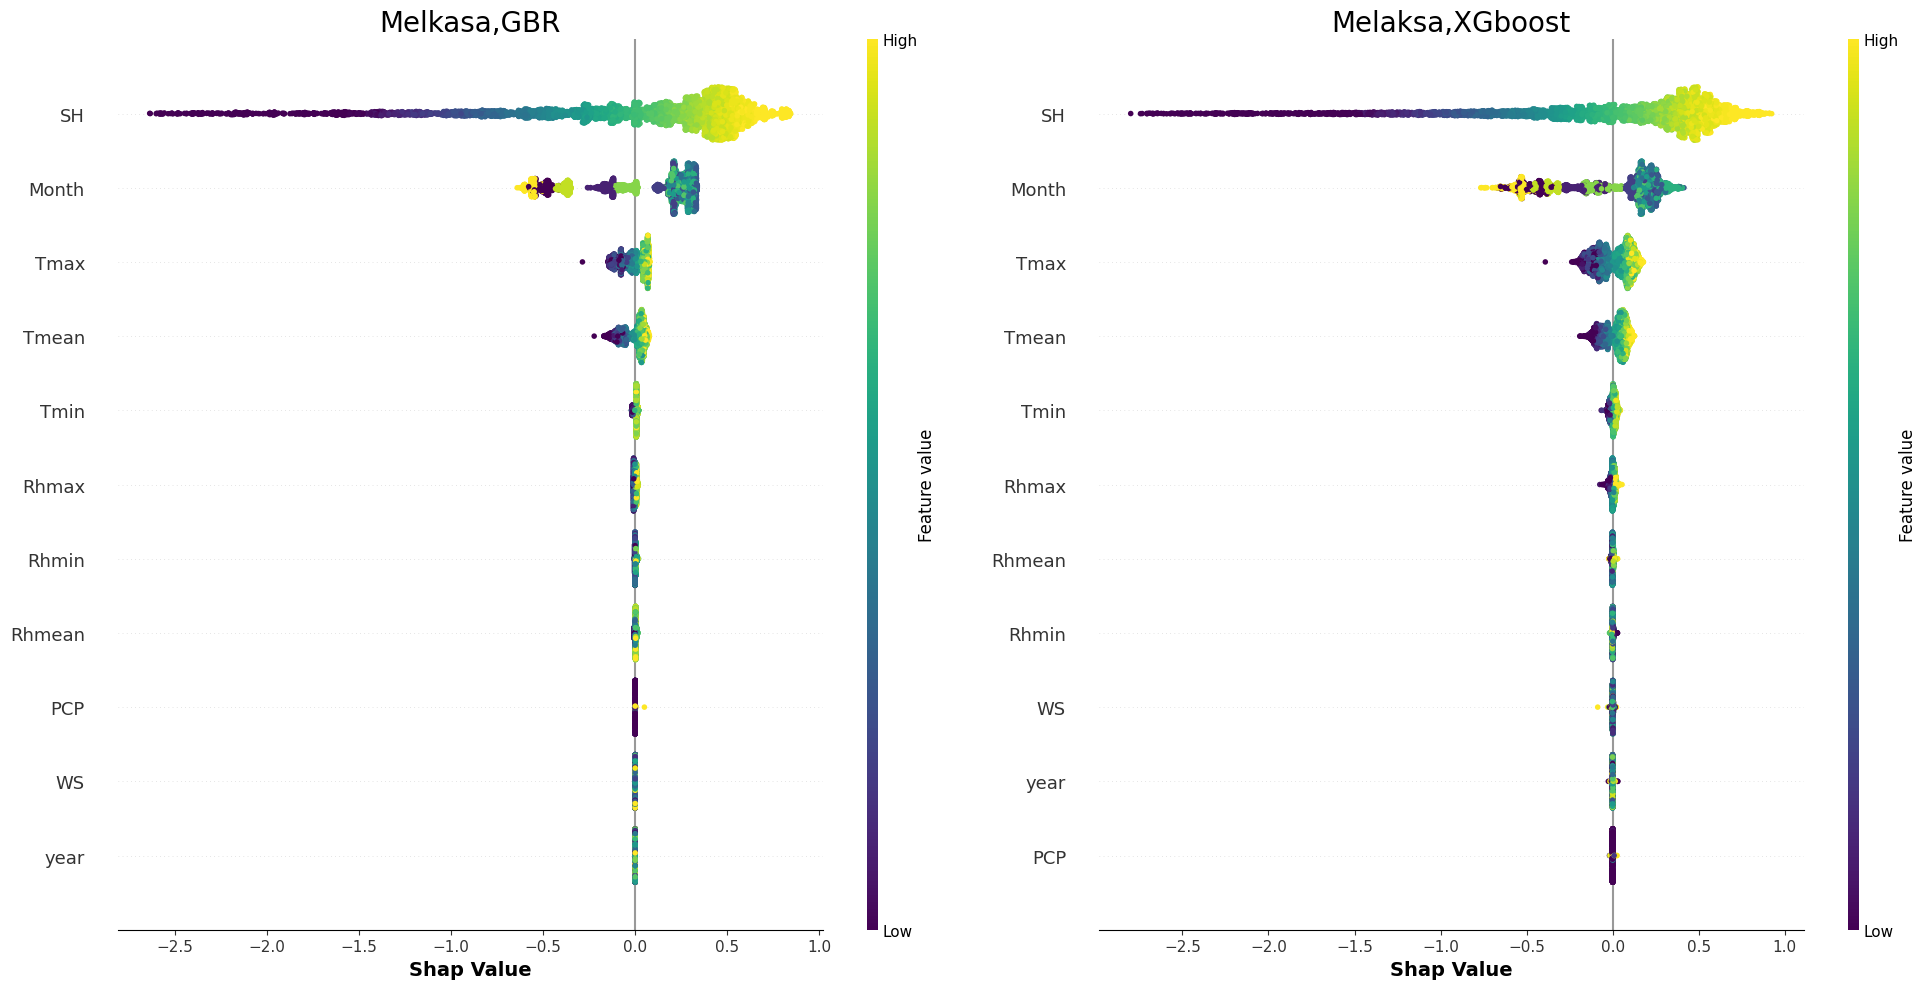

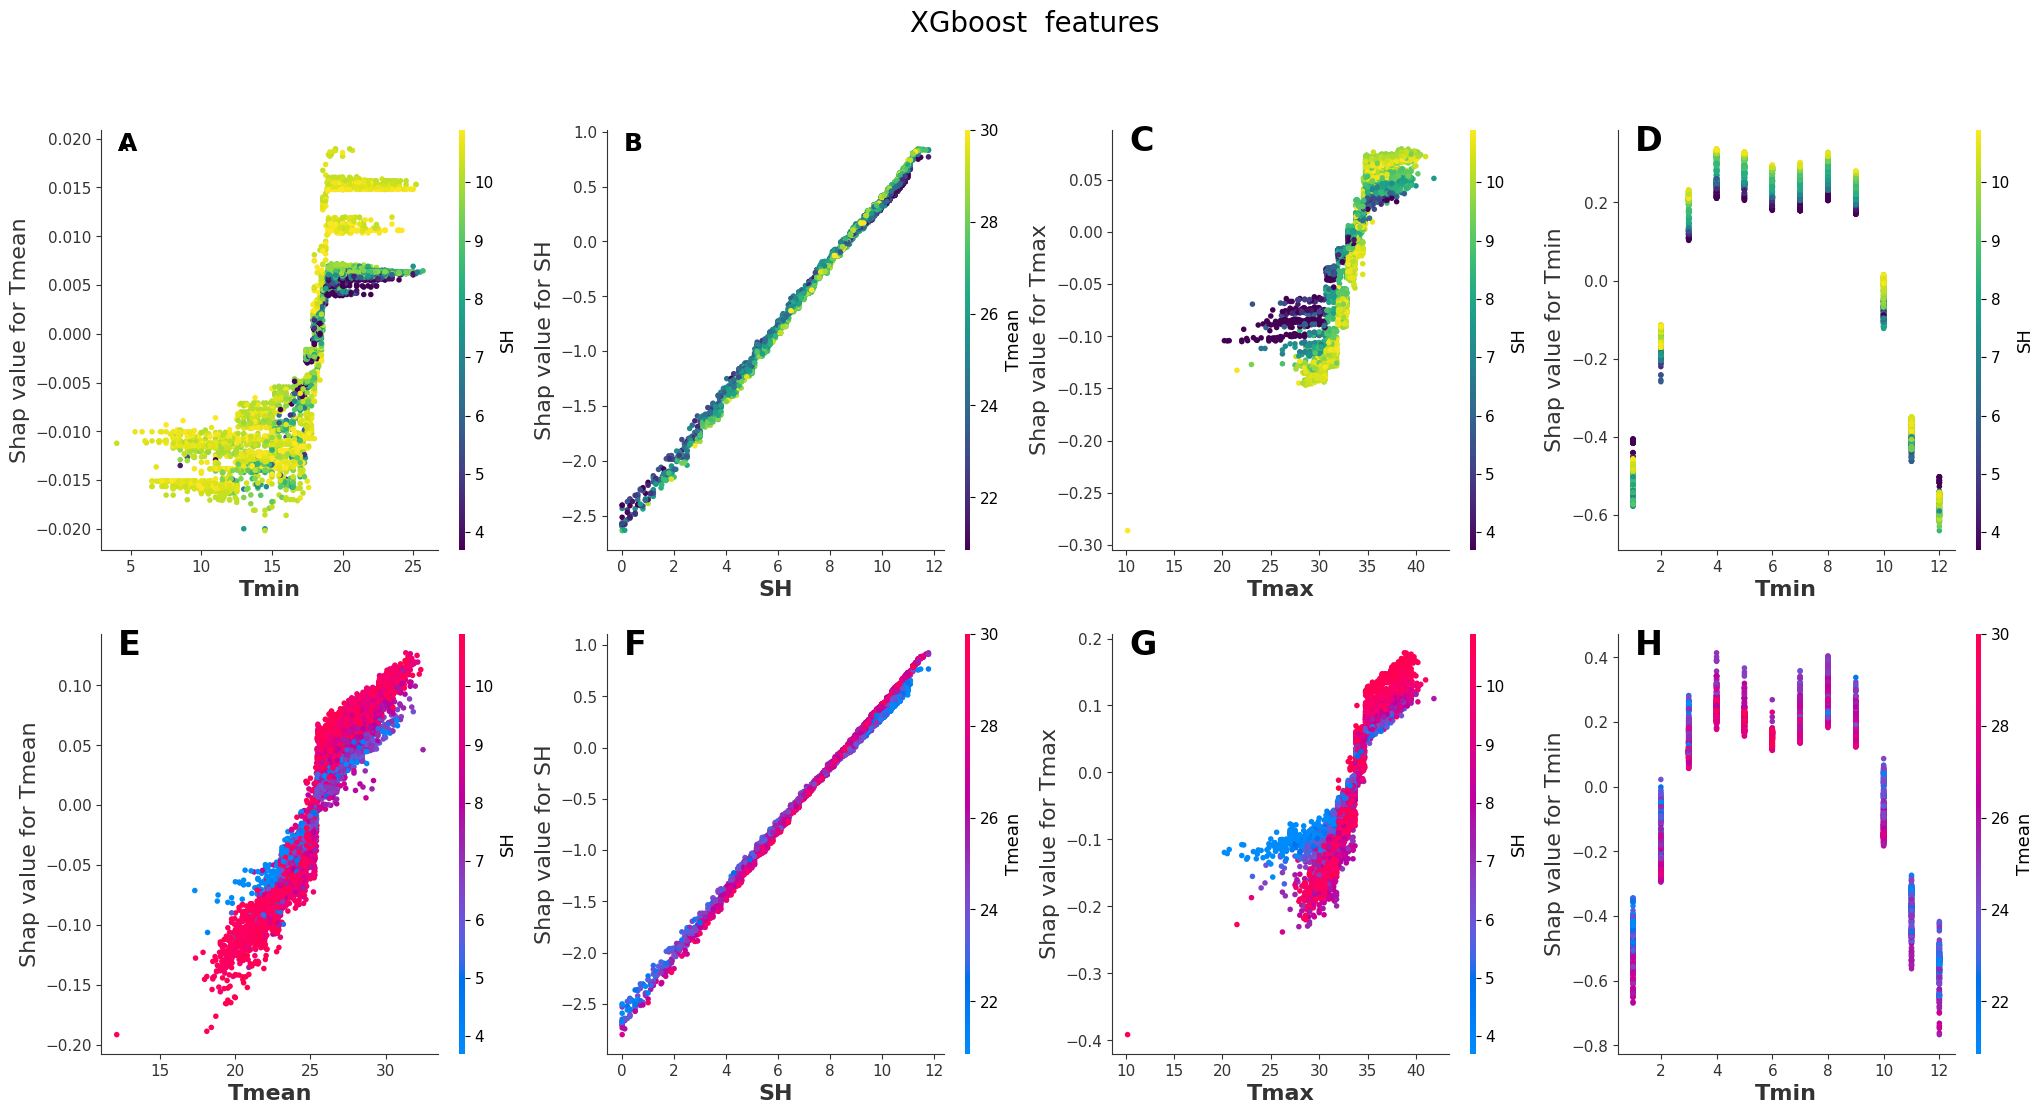

In [26]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split

X = df.drop(["Evapoavg"], axis=1)
y = df["Evapoavg"]
X_features = X.columns
feature_names= ['PCP', 'Tmin', 'Tmax','Tmean', 'SH','Rhmin','Rhmax','Rhmean','Year','month','Evapoavg','WS']
from sklearn.ensemble import GradientBoostingRegressor
# Models fitted
GB = GradientBoostingRegressor(random_state = 42)
GB.fit(X_train, Y_train)
from xgboost.sklearn import XGBRegressor
xgb_model = XGBRegressor(random_state=30)
xgb_model.fit(X_train, Y_train,verbose = 1)
feature_names= ['PCP', 'Tmin', 'Tmax','Tmean', 'SH','Rhmin','Rhmax','Rhmean','Year','month','Evapoavg','WS']
# shap values
import shap

ex = shap.TreeExplainer(GB)
shap_values = ex.shap_values(X_train)
#shap.summary_plot(shap_values, X_train)

ex = shap.TreeExplainer(xgb_model)
shap_valuesxgb = ex.shap_values(X_train)
#shap.summary_plot(shap_valuesxgb, X_train)

# Plots for summary of both models
fig, axes = plt.subplots(nrows=2, ncols=4)
ax1 = plt.subplot(121)
shap.summary_plot(shap_values, X_train,cmap = "viridis",feature_names=X_features,show=False)
ax1.set_title("Melkasa,GBR",fontsize=20)
ax1.set_xlabel("Shap Value",fontweight ="bold",fontsize=14)
ax2 = plt.subplot(122)
shap.summary_plot(shap_valuesxgb, X_train,cmap = "viridis",feature_names=X_features,show=False)
ax2.set_title("Melaksa,XGboost",fontsize=20)
ax2.set_xlabel("Shap Value",fontweight ="bold",fontsize=14)
#ax2.yaxis.offsetText.set_fontsize(25)
plt.gcf().set_size_inches(20,10)
#fig.suptitle(' GBR features ', fontsize=30)
plt.savefig("gbme.png",dpi=150, bbox_inches='tight')
plt.tight_layout()
plt.show()



# dependency plot for GBR,models
fig, axes = plt.subplots(nrows=2, ncols=4)
ax1 = plt.subplot(241)
shap.dependence_plot('Tmin', shap_values, X_train, ax=ax1,cmap=plt.get_cmap("viridis"),feature_names=X_features,show=False)
ax1.set_xlabel("Tmin",fontweight ="bold",fontsize=16)
ax1.set_ylabel("Shap value for Tmean",fontsize=16)

ax2 = plt.subplot(242)
shap.dependence_plot('SH', shap_values, X_train, ax=ax2,cmap=plt.get_cmap("viridis"),feature_names=X_features,show=False)
ax2.set_xlabel("SH",fontweight ="bold",fontsize=16)
ax2.set_ylabel("Shap value for SH",fontsize=16)

ax3 = plt.subplot(243)
shap.dependence_plot('Tmax', shap_values, X_train, ax=ax3,cmap=plt.get_cmap("viridis"),feature_names=X_features,show=False)
ax3.set_xlabel("Tmax",fontweight ="bold",fontsize=16)
ax3.set_ylabel("Shap value for Tmax",fontsize=16)

ax4=plt.subplot(244)
shap.dependence_plot('Month', shap_values, X_train, ax=ax4,cmap=plt.get_cmap("viridis"),feature_names=X_features,show=False)
ax4.set_xlabel("Tmin",fontweight ="bold",fontsize=16)
ax4.set_ylabel("Shap value for Tmin",fontsize=16)
#plt.gcf().set_size_inches(20,6)
#fig.suptitle('Local interprebilty,GBR ', fontsize=20)
#plt.savefig("ddm.png",dpi=150, bbox_inches='tight')
#plt.tight_layout()
#plt.show()

# dependency plot for XGboost MODEL
ax5 = plt.subplot(245)
shap.dependence_plot('Tmean', shap_valuesxgb, X_train, feature_names=X_features,ax=ax5,show=False)
ax5.set_xlabel("Tmean",fontweight ="bold",fontsize=16)
ax5.set_ylabel("Shap value for Tmean",fontsize=16)

ax6 = plt.subplot(246)
shap.dependence_plot('SH', shap_valuesxgb, X_train, feature_names=X_features,ax=ax6,show=False)
ax6.set_xlabel("SH",fontweight ="bold",fontsize=16)
ax6.set_ylabel("Shap value for SH",fontsize=16)

ax7 = plt.subplot(247)
shap.dependence_plot('Tmax', shap_valuesxgb, X_train,feature_names=X_features, ax=ax7,show=False)
ax7.set_xlabel("Tmax",fontweight ="bold",fontsize=16)
ax7.set_ylabel("Shap value for Tmax",fontsize=16)

ax8=plt.subplot(248)
shap.dependence_plot('Month', shap_valuesxgb, X_train,feature_names=X_features, ax=ax8,show=False)
ax8.set_xlabel("Tmin",fontweight ="bold",fontsize=16)
plt.text(0.05, 0.95, "A", fontweight="bold", transform=ax1.transAxes)
ax8.set_ylabel("Shap value for Tmin",fontsize=16)

plt.text(0.05, 0.95, "A", fontweight="bold",fontsize=18, transform=ax1.transAxes)
plt.text(0.05, 0.95, "B", fontweight="bold",fontsize=18, transform=ax2.transAxes)
plt.text(0.05, 0.95, "C", fontweight="bold",fontsize=24, transform=ax3.transAxes)
plt.text(0.05, 0.95, "D", fontweight="bold",fontsize=24, transform=ax4.transAxes)
plt.text(0.05, 0.95, "E", fontweight="bold",fontsize=24, transform=ax5.transAxes)
plt.text(0.05, 0.95, "F", fontweight="bold",fontsize=24, transform=ax6.transAxes)
plt.text(0.05, 0.95, "G", fontweight="bold",fontsize=24, transform=ax7.transAxes)
plt.text(0.05, 0.95, "H", fontweight="bold",fontsize=24, transform=ax8.transAxes)
#plt.text(0.05, 0.95, "I", fontweight="bold",fontsize=24, transform=ax9.transAxes)
#plt.text(0.05, 0.95, "J", fontweight="bold",fontsize=24, transform=ax10.transAxes)

plt.gcf().set_size_inches(25,12)
fig.suptitle('XGboost  features ', fontsize=20)
plt.savefig("rrr.png",dpi=150, bbox_inches='tight')
plt.tight_layout()
plt.show()

# Thankyou!